# manipulate streamflow values

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [8]:
filepath = '/Users/vano/Dropbox/raid/saukr/streamflow/historical/%s.day'
location = 'SAUKR'
filepath%location 

'/Users/vano/Dropbox/raid/saukr/streamflow/historical/SAUKR.day'

In [9]:
df = pd.read_csv(filepath%(location),delim_whitespace=True, header=None, names=['Y','M','D','flow'])

#to get indexing (but actually use averages then groupby, is there a better way?)
dates = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') 
dateindex = df.set_index(dates[:])
pd.set_option('display.max_rows', 12)
dateindex

,Y,M,D,flow
1915-01-01,1915,1,1,939.728333
1915-01-02,1915,1,2,707.462219
1915-01-03,1915,1,3,2372.477780
1915-01-04,1915,1,4,793.760132
1915-01-05,1915,1,5,425.823730
1915-01-06,1915,1,6,467.030670
...,...,...,...,...
2006-12-26,2006,12,26,4498.127440
2006-12-27,2006,12,27,4919.506350
2006-12-28,2006,12,28,4119.759770


In [10]:
#df.groupby(['Y']).get_group(1915) #year
df.groupby(['M']).get_group(1) #JAN
# is there a way to do day of the year averages? XXX

groupedM = df.groupby('M')
groupedY = df.groupby('Y')

#x = groupedY['flow'].agg([np.sum, np.mean, np.std, np.max, np.min])  #CALENDAR YEAR
x = groupedM['flow'].agg([np.sum, np.mean, np.std, np.max, np.min]) #MONTHLY
x

,sum,mean,std,amax,amin
M,,,,,
1,10907936.215084,3824.662067,3134.381554,36984.8398,425.823730
2,10091428.087086,3882.811884,2962.287447,36572.2930,735.110840
3,12683733.639430,4447.311935,2233.404548,29405.0547,1211.444820
4,18821710.872440,6819.460461,2584.955420,26073.3379,1946.878300
5,23668315.802620,8298.848458,2648.408346,28050.1875,2538.653080
6,23182524.479096,8399.465391,2942.475939,22502.6602,774.025757
7,15659139.550607,5490.581890,3076.962290,24661.9180,398.329865
8,5926863.837989,2078.143001,1864.937351,18773.1289,187.976379
9,3847114.571767,1393.882091,1518.371126,15132.9365,173.541794


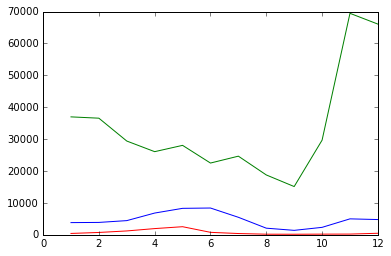

In [11]:
fig = plt.figure()
# how do you read 'M' or 'Y' to have that plotted on the graph too?
plt.plot(x['mean'])
plt.plot(x['amax'])
plt.plot(x['amin'])


I'd like to:
 plot the 4th largest value each month (look at np fuctions)
 write out dates for top events (e.g. four in each month) - sort a groupby and look at index?

PLACES TO LOOK FOR HELP:
http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby

QUESTIONS:  
f = np.loadtxt(workfile%location) # if read in by np (would this be better for what I'm doing?)


In [13]:
#months = 

#months = [3]

#for mon in range(1,1):
#    y = df.groupby(['M']).get_group(mon)
#    z = y.sort('flow')
#    i = z[-2:]
    #list = list.append(i)
#list 


y = df.groupby(['M']).get_group(9)
#z = y.sort('flow')
z = dateindex.sort_values('flow')
high = z[-10:]
high
#low = z[10:]
#low
    #    weatherday = pd.read_csv(filepath%(eventdate,day),delim_whitespace=True, header=None, names=['y','m','d',-30*day+1],usecols=[3])
#    data = pd.DataFrame.join(data,weatherday)


#y = df.groupby(['M']).get_group(1)
#z = y.sort('flow')
#z[-5:]


,Y,M,D,flow
1999-11-13,1999,11,13,38551.9727
2001-11-15,2001,11,15,40326.5117
1995-11-29,1995,11,29,44048.0352
1917-12-31,1917,12,31,44774.1055
1921-12-11,1921,12,11,50497.8438
2006-11-07,2006,11,7,51344.2578
1917-12-29,1917,12,29,54278.5312
1921-12-12,1921,12,12,66082.1719
1990-11-24,1990,11,24,67004.0312
1999-11-12,1999,11,12,69458.3516
